# Exercise Week 5 L10

In [23]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro, bartlett
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Load data

In [2]:
data_file = '../Data/chl_data_stationX.txt'

In [4]:
df = pandas.read_table(data_file, delim_whitespace=True)
df.head()

,year,month,dd,y
0,2011,1,2011.08,0.10
1,2011,2,2011.15,0.17
2,2011,3,2011.23,0.21
3,2011,4,2011.31,0.19
4,2011,5,2011.38,0.11


## Date index

In [5]:
dates = []
for index, row in df.iterrows():
    dates.append(f'{int(row.year)}-{int(row.month)}')
dates = pandas.to_datetime(dates)
df['date'] = dates
df.set_index('date', inplace=True)
df.head()

,year,month,dd,y
date,,,,
2011-01-01,2011,1,2011.08,0.10
2011-02-01,2011,2,2011.15,0.17
2011-03-01,2011,3,2011.23,0.21
2011-04-01,2011,4,2011.31,0.19
2011-05-01,2011,5,2011.38,0.11


# 2. Plot the time series

<AxesSubplot:xlabel='date', ylabel='monthly chlorophyll concentration (mg/m3)'>

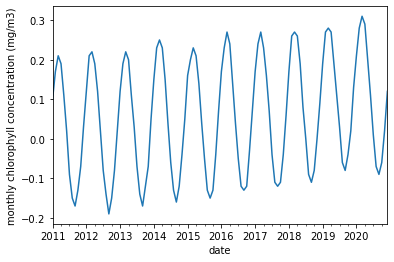

In [7]:
df.y.plot(ylabel='monthly chlorophyll concentration (mg/m3)')

# 3. Standard decomposition

In [8]:
result=seasonal_decompose(df.y, model='additive', period=12)

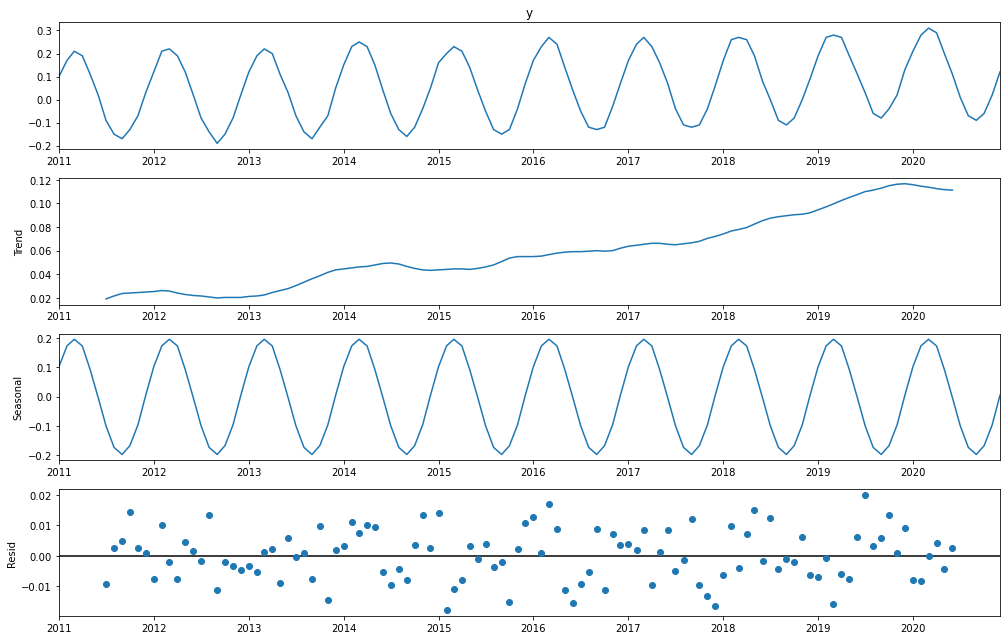

In [9]:
fig = result.plot()
fig.set_size_inches((14, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Strong seasonal component

## Significant trend

## Ok residuals

# 4. Linear fit with dummy variables

## Dummy variables

In [11]:
len(df)

120

In [13]:
dummy = np.zeros((len(df), 11), dtype=int)
for i in np.arange(11):
    for j in np.arange(len(df)):
        if df.month.values[j] == i+1:
            dummy[j,i] = 1

## Setup

In [14]:
time = np.arange(len(df)) + 1

In [15]:
data = pandas.DataFrame()
data['ch4'] = df.y.values
data['time'] = time
dummies = []
for idum in np.arange(11):
    key = f'dum{idum}'
    dummies.append(key)
    data[key] = dummy[:,idum]

## Fit

In [16]:
formula = "ch4 ~ dum0 + dum1 + dum2 + dum3 + dum4 + dum5 + dum6 + dum7 + dum8 + dum9 + dum10 + time"
mod1 = smf.glm(formula=formula, data=data).fit()#, family=sm.f

In [17]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    ch4   No. Observations:                  120
Model:                            GLM   Df Residuals:                      107
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                      0.00014461
Method:                          IRLS   Log-Likelihood:                 367.10
Date:                Mon, 02 May 2022   Deviance:                     0.015473
Time:                        09:47:22   Pearson chi2:                   0.0155
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0092      0.004      2.122      0.034       0.001       0.018
dum0           0.0970      0.005     17.992      0.000       0.086       0.108
dum1           0.1681      0.005     31.195      0.000       0.157       0.179
dum2           0.1922      0.005     35.679      0.000       0.182       0.203
dum3           0.1692      0.005     31.436      0.000       0.159       0.180
dum4           0.0883      0.005     16.413      0.000       0.078       0.099
dum5          -0.0076      0.005     -1.406      0.160      -0.018       0.003
dum6          -0.1045      0.005    -19.418      0.000      -0.115      -0.094
dum7          -0.1794      0.005    -33.345      0.000      -0.190      -0.169
dum8          -0.2033      0.005    -37.794      0.000      -0.214      -0.193
dum9          -0.1732      0.005    -32.202      0.000      -0.184      -0.163
dum10         -0.1011      0.005    -18.798      0.000      -0.112      -0.091
time           0.0009   3.18e-05     28.438      0.000       0.001       0.001
==============================================================================
"""

# 5. Plot

<Figure size 432x288 with 0 Axes>

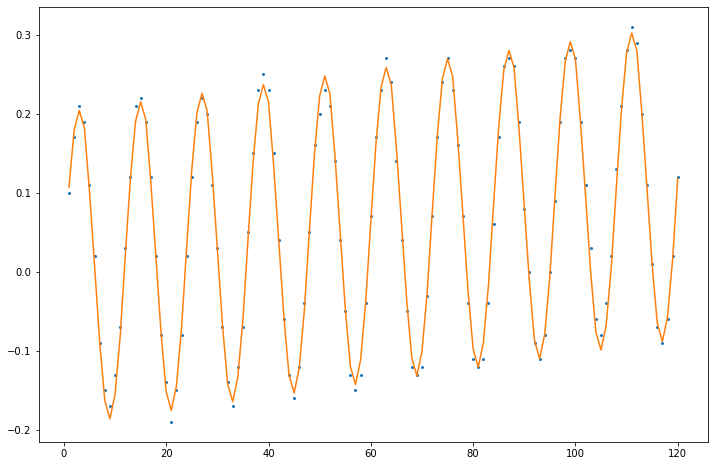

In [18]:
plt.clf()
fig = plt.figure(figsize=(12,8))
#
ax = plt.gca()
ax.plot(data['time'], data['ch4'], 'o', ms=2)
# Fit
ax.plot(data['time'], mod1.fittedvalues)
#
plt.show()

# 6. ACF, PACF 

## Residuals

In [20]:
resids = data.ch4 - mod1.fittedvalues

## ACF Plot

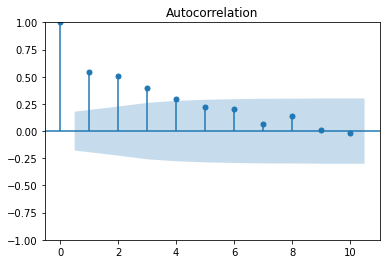

In [22]:
fig = plot_acf(resids, lags=10)

## PACF Plot

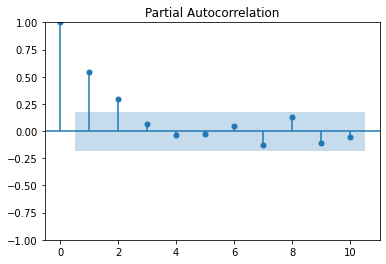

In [26]:
fig2 = plot_pacf(resids, lags=10, method='ywm')